In [ ]:
from matplotlib.pyplot import imread, imshow, imsave
from keras.datasets import cifar10

In [ ]:
(train_x,train_y),(test_x,test_y) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Train X shape ',train_x.shape)
print('Train Y shape ',train_y.shape)
print('Test  X shape ',test_x.shape)
print('Test  Y shape ',test_y.shape)


Train X shape  (50000, 32, 32, 3)
Train Y shape  (50000, 1)
Test  X shape  (10000, 32, 32, 3)
Test  Y shape  (10000, 1)


[4]


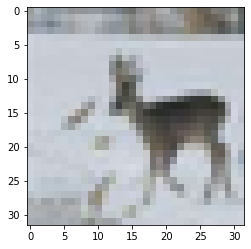

In [ ]:
imshow(train_x[20])
print(train_y[20])

In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import tensorflow as tf

Model CNN


In [ ]:
num_classes = 10

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=10, 
                    validation_data=(test_x, test_y))


Epoch 1/10
1563/1563 [==============================] - 44s 7ms/step - loss: 2.2801 - accuracy: 0.3893 - val_loss: 1.4174 - val_accuracy: 0.5683
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2542 - accuracy: 0.6120 - val_loss: 0.9379 - val_accuracy: 0.7042
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9504 - accuracy: 0.6984 - val_loss: 0.9232 - val_accuracy: 0.7156
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8360 - accuracy: 0.7395 - val_loss: 0.8616 - val_accuracy: 0.7321
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7623 - accuracy: 0.7675 - val_loss: 0.8262 - val_accuracy: 0.7591
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7121 - accuracy: 0.7903 - val_loss: 0.8704 - val_accuracy: 0.7482
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6899 - accuracy: 0.8066 - val_loss: 0.7336 - val_ac

In [ ]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

In [ ]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate
    

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [ ]:

num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
 

In [ ]:
weight_decay = 1e-4

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)       

In [ ]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    )


In [ ]:
datagen.fit(x_train)

In [ ]:
#training
batch_size = 64

In [ ]:
opt_rms = keras.optimizers.RMSprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=125,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])
model.save_weights('model.h5') 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/125
781/781 [==============================] - 28s 35ms/step - loss: 2.3956 - accuracy: 0.3442 - val_loss: 1.3505 - val_accuracy: 0.5887
Epoch 2/125
781/781 [==============================] - 26s 34ms/step - loss: 1.3836 - accuracy: 0.5692 - val_loss: 1.2127 - val_accuracy: 0.6459
Epoch 3/125
781/781 [==============================] - 26s 34ms/step - loss: 1.1566 - accuracy: 0.6389 - val_loss: 1.0433 - val_accuracy: 0.6852
Epoch 4/125
781/781 [==============================] - 27s 34ms/step - loss: 0.9937 - accuracy: 0.6874 - val_loss: 0.9452 - val_accuracy: 0.7231
Epoch 5/125
781/781 [==============================] - 27s 34ms/step - loss: 0.9333 - accuracy: 0.7148 - val_loss: 0.8405 - val_accuracy: 0.7528
Epoch 6/125
781/781 [==============================] - 27s 34ms/step - loss: 0.8848 - accuracy: 0.7289 - val_loss: 0.8002 - val_accuracy: 0.7651
Epoch 7/125
781/781 [==============================] - 27s 34ms/step - loss: 0.8367 - accuracy: 0.7461 - val_loss: 0.7019 - val_ac

In [ ]:
 #testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

79/79 [==============================] - 1s 5ms/step - loss: 0.4773 - accuracy: 0.8804

Test result: 88.040 loss: 0.477


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship', 'dog', 'horse', 'ship', 'frog', 'horse', 'airplane', 'deer', 'truck', 'deer', 'bird']


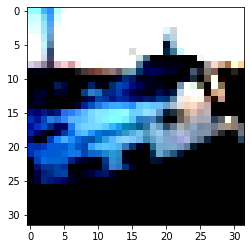

In [ ]:
from matplotlib import pyplot

model.load_weights('model.h5')
 
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
 
indices = np.argmax(model.predict(x_test[:26]),1)
print([labels[x] for x in indices])
imshow(x_test[2])

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_54 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_63 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_55 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_64 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 16, 16, 32)      

In [ ]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,

    )

In [ ]:
datagen.fit(x_train)

In [ ]:
batch_size=64

In [ ]:
opt_rms = keras.optimizers.RMSprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=300,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])
model.save_weights('model.h5') 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
781/781 [==============================] - 30s 36ms/step - loss: 0.9819 - accuracy: 0.6889 - val_loss: 0.9619 - val_accuracy: 0.7099
Epoch 2/300
781/781 [==============================] - 28s 36ms/step - loss: 0.9290 - accuracy: 0.7140 - val_loss: 0.7714 - val_accuracy: 0.7732
Epoch 3/300
781/781 [==============================] - 28s 36ms/step - loss: 0.9044 - accuracy: 0.7248 - val_loss: 0.8493 - val_accuracy: 0.7583
Epoch 4/300
781/781 [==============================] - 28s 36ms/step - loss: 0.8885 - accuracy: 0.7319 - val_loss: 0.7948 - val_accuracy: 0.7723
Epoch 5/300
781/781 [==============================] - 28s 36ms/step - loss: 0.8587 - accuracy: 0.7459 - val_loss: 0.8509 - val_accuracy: 0.7656
Epoch 6/300
781/781 [==============================] - 28s 36ms/step - loss: 0.8399 - accuracy: 0.7545 - val_loss: 0.8063 - val_accuracy: 0.7764
Epoch 7/300
781/781 [==============================] - 28s 36ms/step - loss: 0.8225 - accuracy: 0.7613 - val_loss: 0.7786 - val_ac

In [ ]:
 #testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

79/79 [==============================] - 0s 6ms/step - loss: 0.3913 - accuracy: 0.9006

Test result: 90.060 loss: 0.391


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['cat', 'ship', 'ship', 'ship', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship', 'dog', 'horse', 'ship', 'frog', 'horse', 'airplane', 'deer', 'truck', 'dog', 'bird']


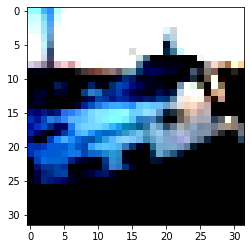

In [ ]:
from matplotlib import pyplot

model.load_weights('model.h5')
 
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
 
indices = np.argmax(model.predict(x_test[:26]),1)
print([labels[x] for x in indices])
imshow(x_test[2])

In [ ]:
indices = np.argmax(model.predict(x_test[0:1]),1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['airplane']


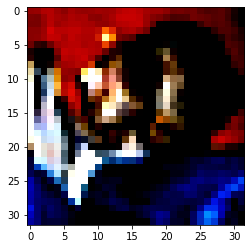

In [ ]:
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print([labels[x] for x in indices])